In [3]:
# BMI 데이터를 학습한 후 자신의 키와 몸무게를 넣어서
# 자신의 상태를 확인해보아요
# bmi.csv를 가져가서 multinomial 문제를 학습해보아요!

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
from sklearn.preprocessing import MinMaxScaler

#warning.filterwarnings(action = '')


label     0
height    0
weight    0
dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x1fcc0d336a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fcc0d33d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fcc0d16c50>],
 'medians': [<matplotlib.lines.Line2D at 0x1fcc0d3d438>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fcc0d3d780>],
 'means': []}

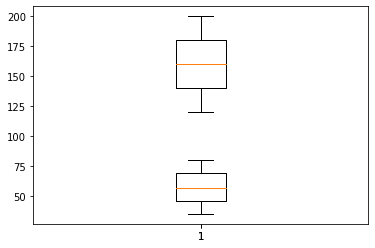

In [5]:
#data loading
data_df = pd.read_csv("./data/bmi.csv", skiprows=3)

# 결측치 확인 
print(data_df.isnull().sum(axis=0)) # 확인한 결과
# 이상치 확인
plt.boxplot(data_df["weight"])
plt.boxplot(data_df["height"])

# 확인하니 별거 없네요



In [34]:
# train, test data set 생성
# 80퍼센트 만 트레이닝 데이타로 삼고
split_num = int(data_df.shape[0] * 0.8)
print(split_num)

tr_x_data = data_df.loc[:split_num, ['height','weight']]
print(tr_x_data)

16000
       height  weight
0         188      71
1         161      68
2         178      52
3         136      63
4         145      52
...       ...     ...
15996     164      63
15997     161      73
15998     185      41
15999     171      72
16000     147      53

[16001 rows x 2 columns]


In [35]:
# 스케일링 전처리 분야 -> normalization -> 8:2 

scaler = MinMaxScaler()
# tr_x_data1 = scaler.fit_transform(tr_x_data) # fit()함수는 min max data 갖과와
print(tr_x_data1)   

s#caler.data_min_

# scaler 가 train_data_set에 대ㅎ한 최대 최소값을 가지고 있? 

[[0.85       0.8       ]
 [0.5125     0.73333333]
 [0.725      0.37777778]
 ...
 [0.8125     0.13333333]
 [0.6375     0.82222222]
 [0.3375     0.4       ]]


AttributeError: 'MinMaxScaler' object has no attribute 'data_min_'

In [51]:
 # 정규화 직업을 진행
x_data = scaler.fit_transform(data_df[["height", "weight"]]) # normalization
print(x_data)

# 학습용 테스트용 x data를 생성
train_x_data = x_data[:split_num]
test_x_data = x_data[split_num:]

test_x_data.shape

# 학습용 


[[0.85       0.8       ]
 [0.5125     0.73333333]
 [0.725      0.37777778]
 ...
 [0.375      0.28888889]
 [0.8625     0.75555556]
 [0.275      0.13333333]]


(4000, 2)

In [57]:
# 학습용 테스트용 y data를 생성 -> one hot encoding
# one hot encoding 으로 전환시킬 때 pandas.get_dummies(), tensorflow.one_hot()

data_df.loc[:split_num, "label"]

sess = tf.Session()
#print(train_x_data.shape)

#train_y_data = sess.run(tf.one_hot(data_df.loc[:split_num-1, "label"], 3)).shape # split으로 끊어내는데 차이가 잇을수 잇어요?
test_y_data = sess.run(tf.one_hot(data_df.loc[split_num:, "label"], 3)) # 스플릿 넘버 - 1 

train_y_data = sess.run(tf.one_hot(data_df.loc[:split_num-1, "label"], 3))


#print(train_y_data.shape)




In [59]:
size_test_y = sess.run(tf.one_hot(data_df.loc[split_num:, "label"], 3)).shape
size_train_y = sess.run(tf.one_hot(data_df.loc[:split_num-1, "label"], 3)).shape
print(size_test_y)
print(size_train_y)

(4000, 3)
(16000, 3)


In [41]:
print(train_x_data)
print(train_y_data)

[[0.85       0.8       ]
 [0.5125     0.73333333]
 [0.725      0.37777778]
 ...
 [0.5125     0.84444444]
 [0.8125     0.13333333]
 [0.6375     0.82222222]]
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [61]:
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,3], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([2,3]), name='weight') # 매트릭스로 표현
b = tf.Variable(tf.random_normal([3]), name='bias')

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# cost function
# cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits= logit, labels=Y) )
# sigmoid 를 안 쓰고 소프트맥스를 써요
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=Y) )

# train
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(30000):
    _, cost_val = sess.run([train, cost],
                          feed_dict = {X : train_x_data,
                                      Y: train_y_data})
    if step % 3000 == 0:
        print("cost 값은 : {}".format(cost_val))

cost 값은 : 1.2388445138931274
cost 값은 : 0.35936835408210754
cost 값은 : 0.283021479845047
cost 값은 : 0.24500471353530884
cost 값은 : 0.22091315686702728
cost 값은 : 0.20380567014217377
cost 값은 : 0.19081011414527893
cost 값은 : 0.18048498034477234
cost 값은 : 0.17201414704322815
cost 값은 : 0.1648940145969391


In [62]:
predict = tf.argmax(H, axis=1) # 가장 큰 값 인덱스 번호를 리턴
correct = tf.equal(predict, tf.argmax(Y,axis=1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32) )
print("Accuracy: {}".format(sess.run(accuracy, feed_dict={X:test_x_data, Y:test_y_data})))

Accuracy: 0.9797499775886536


In [63]:
# prediction
prediction_data = scaler.transform([[187,78]])
result = sess.run(tf.argmax(H,1), feed_dict={X: prediction_data})[0]

if result == 0:
    print("FAT")
elif result == 1:
    print("NORMAL")
else:
    print("THIN")

NORMAL
